In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm


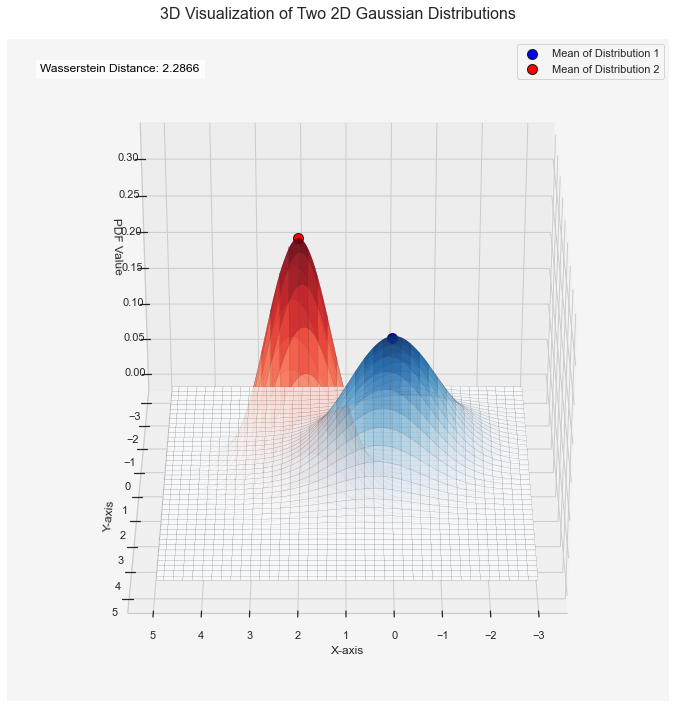

In [2]:
# Set Seaborn style
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5"})

mean1 = [0, 0]
cov1 = np.array([[1, 0.2], [0.2, 1]])

mean2 = [2, 1]
cov2 = np.array([[0.5, -0.1], [-0.1, 0.5]])

x, y = np.mgrid[-3:5:.05, -3:5:.05]
pos = np.dstack((x, y))

rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)

# Compute Wasserstein-2 Distance
mean_diff = np.linalg.norm(np.array(mean1) - np.array(mean2))

cov1_sqrt = sqrtm(cov1)
if np.iscomplexobj(cov1_sqrt):
    cov1_sqrt = cov1_sqrt.real  # Remove rounding error

cov_mid = np.dot(cov1_sqrt, np.dot(cov2, cov1_sqrt))
cov_mid_sqrt = sqrtm(cov_mid)
if np.iscomplexobj(cov_mid_sqrt):
    cov_mid_sqrt = cov_mid_sqrt.real  # Remove error

trace_term = np.trace(cov1 + cov2 - 2 * cov_mid_sqrt)
wasserstein_dist = np.sqrt(mean_diff**2 + trace_term)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot for Gaussians
ax.plot_surface(
    x, y, z1, cmap='Blues', alpha=0.7, edgecolor='k', linewidth=0.1, antialiased=True
)

ax.plot_surface(
    x, y, z2, cmap='Reds', alpha=0.7, edgecolor='k', linewidth=0.1, antialiased=True
)

ax.scatter(mean1[0], mean1[1], np.max(z1), color='blue', s=100, label='Mean of Distribution 1', edgecolor='k')
ax.scatter(mean2[0], mean2[1], np.max(z2), color='red', s=100, label='Mean of Distribution 2', edgecolor='k')

ax.text2D(
    0.05, 0.95, f'Wasserstein Distance: {wasserstein_dist:.4f}',
    transform=ax.transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7)
)

ax.set_title('3D Visualization of Two 2D Gaussian Distributions', fontsize=16, pad=20)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.set_zlabel('PDF Value', fontsize=12)
ax.legend(loc='upper right')

# camera angle
ax.view_init(elev=30, azim=90)

# Show the plot
plt.tight_layout()
plt.show()


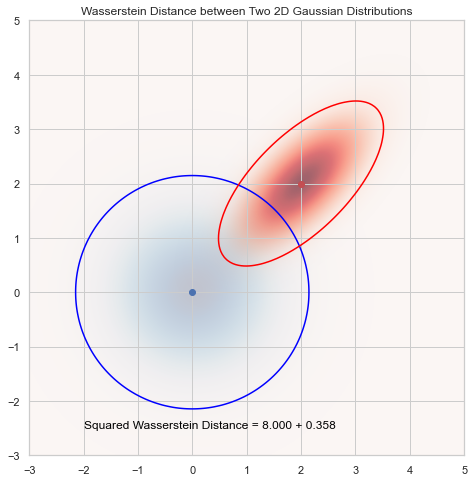

In [23]:
mean1 = [0, 0]
cov1 = np.array([[1, 0], [0, 1]])

mean2 = [2, 2]
cov2 = np.array([[1/2, 1/3], [1/3, 1/2]])

x, y = np.mgrid[-3:5:.05, -3:5:.05]
pos = np.dstack((x, y))

rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)

mean_diff = np.linalg.norm(np.array(mean1) - np.array(mean2),2)


cov1_sqrt = sqrtm(cov1)
if np.iscomplexobj(cov1_sqrt):
    cov1_sqrt = cov1_sqrt.real  # Remove errors

cov_mid = np.dot(cov1_sqrt, np.dot(cov2, cov1_sqrt))
cov_mid_sqrt = sqrtm(cov_mid)
if np.iscomplexobj(cov_mid_sqrt):
    cov_mid_sqrt = cov_mid_sqrt.real  # Remove errors

trace_term = np.trace(cov1 + cov2 - 2 * cov_mid_sqrt)
squared_wasserstein_dist = mean_diff**2 + trace_term

fig, ax = plt.subplots(figsize=(10, 8))

# Plot ditributions
ax.imshow(
    z1.T, 
    extent=(-3, 5, -3, 5), 
    origin='lower', 
    cmap='Blues', 
    alpha=0.6, 
    interpolation='bilinear'
)

ax.imshow(
    z2.T, 
    extent=(-3, 5, -3, 5), 
    origin='lower', 
    cmap='Reds', 
    alpha=0.6, 
    interpolation='bilinear'
)

# Add one contour on the boundary of each distribution
contour_level_1 = np.max(z1) * 0.1  
contour_level_2 = np.max(z2) * 0.1  

ax.contour(
    x, y, z1, 
    levels=[contour_level_1], 
    colors='blue', 
    linewidths=1.5,
)

ax.contour(
    x, y, z2, 
    levels=[contour_level_2], 
    colors='red', 
    linewidths=1.5,
)

ax.plot(*mean1, 'bo', label='Mean of Distribution 1')
ax.plot(*mean2, 'ro', label='Mean of Distribution 2')

ax.text(-2, -2.5, f'Squared Wasserstein Distance = {mean_diff**2:.3f} + {trace_term:.3f}', fontsize=12, color='black')

plt.title('Wasserstein Distance between Two 2D Gaussian Distributions')
plt.show()


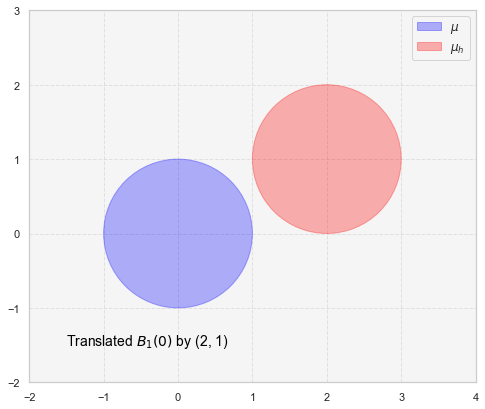

In [ ]:
def plot_translated_balls(center, radius, h, label1, label2):
    center_translated = (center[0] + h[0], center[1] + h[1])
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    circle1 = plt.Circle(center, radius, color='blue', alpha=0.3, label=label1)
    ax.add_patch(circle1)
    
    # Plot the translated ball
    circle2 = plt.Circle(center_translated, radius, color='red', alpha=0.3, label=label2)
    ax.add_patch(circle2)
    
    all_x = [center[0] - radius, center[0] + radius, center_translated[0] - radius, center_translated[0] + radius]
    all_y = [center[1] - radius, center[1] + radius, center_translated[1] - radius, center_translated[1] + radius]
    ax.set_xlim(min(all_x) - 1, max(all_x) + 1)
    ax.set_ylim(min(all_y) - 1, max(all_y) + 1)
    ax.set_aspect('equal')
    
    ax.grid(True, linestyle='--', alpha=0.5)
    
    ax.legend(fontsize=12, loc='upper right')
    ax.text(-1.5, -1.5, f'Translated ' r'$B_1(0)$' f' by {h}', fontsize=14, color='black')
    plt.show()

plot_translated_balls(
    center=(0, 0), radius=1, h=(2, 1),
    label1=r'$\mu$', label2=r'$\mu_h$'
)